In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import numpy as np

In [68]:
import kagglehub
path = kagglehub.dataset_download("olcaybolat1/dermatology-dataset-classification")
print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/olcaybolat1/dermatology-dataset-classification/versions/5


In [69]:
df = pd.read_csv(path + '/dermatology_database_1.csv')

In [70]:
print("Dataset Columns:", df.columns)
print("First Few Rows:\n", df.head())

Dataset Columns: Index(['erythema', 'scaling', 'definite_borders', 'itching',
       'koebner_phenomenon', 'polygonal_papules', 'follicular_papules',
       'oral_mucosal_involvement', 'knee_and_elbow_involvement',
       'scalp_involvement', 'family_history', 'melanin_incontinence',
       'eosinophils_infiltrate', 'PNL_infiltrate', 'fibrosis_papillary_dermis',
       'exocytosis', 'acanthosis', 'hyperkeratosis', 'parakeratosis',
       'clubbing_rete_ridges', 'elongation_rete_ridges',
       'thinning_suprapapillary_epidermis', 'spongiform_pustule',
       'munro_microabcess', 'focal_hypergranulosis',
       'disappearance_granular_layer', 'vacuolisation_damage_basal_layer',
       'spongiosis', 'saw_tooth_appearance_retes', 'follicular_horn_plug',
       'perifollicular_parakeratosis', 'inflammatory_mononuclear_infiltrate',
       'band_like_infiltrate', 'age', 'class'],
      dtype='object')
First Few Rows:
    erythema  scaling  definite_borders  itching  koebner_phenomenon  \
0  

In [71]:
target_column = 'class'
X = df.drop(target_column, axis=1)
y = df[target_column]

In [72]:
X.replace('?', np.nan, inplace=True)
for column in X.columns:
    if X[column].isnull().any():
        X[column] = X[column].astype(float)
        X[column].fillna(X[column].mean(), inplace=True)

<ipython-input-72-bae0933be726>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X[column].fillna(X[column].mean(), inplace=True)


In [73]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [74]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)


SVC(kernel='linear', random_state=42)

In [75]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [76]:
svm_predictions = svm_model.predict(X_test)
rf_predictions = rf_model.predict(X_test)

svm_accuracy = accuracy_score(y_test, svm_predictions)
rf_accuracy = accuracy_score(y_test, rf_predictions)

print(f"SVM Accuracy: {svm_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

SVM Accuracy: 0.96
Random Forest Accuracy: 0.99


In [77]:
# For SVM model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score # Importing confusion_matrix, precision_score, recall_score, and f1_score
svm_cm = confusion_matrix(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')  # Use 'weighted' for multiclass
svm_recall = recall_score(y_test, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')

print("SVM Confusion Matrix:\n", svm_cm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)



SVM Confusion Matrix:
 [[30  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]
SVM Precision: 0.9643734643734645
SVM Recall: 0.9594594594594594
SVM F1 Score: 0.9602495938561514


In [78]:
# For Random Forest model:
rf_cm = confusion_matrix(y_test, rf_predictions)
rf_precision = precision_score(y_test, rf_predictions, average='weighted')
rf_recall = recall_score(y_test, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')

print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)


Random Forest Confusion Matrix:
 [[31  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 13  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Random Forest Precision: 0.9878378378378377
Random Forest Recall: 0.9864864864864865
Random Forest F1 Score: 0.9863916548127075


In [79]:
from sklearn.ensemble import IsolationForest

# Create IsolationForest model
iso_forest = IsolationForest(contamination=0.05)  # Adjust contamination as needed

# Fit the model to your training data
iso_forest.fit(X_train)

# Get outlier predictions for both training and testing data
outlier_predictions_train = iso_forest.predict(X_train)
outlier_predictions_test = iso_forest.predict(X_test)

# Identify inlier indices for both training and testing data
inlier_indices_train = [i for i, prediction in enumerate(outlier_predictions_train) if prediction == 1]
inlier_indices_test = [i for i, prediction in enumerate(outlier_predictions_test) if prediction == 1]

# Remove outliers from training and testing data
X_train_no_outliers = X_train.iloc[inlier_indices_train]
y_train_no_outliers = y_train.iloc[inlier_indices_train]
X_test_no_outliers = X_test.iloc[inlier_indices_test]
y_test_no_outliers = y_test.iloc[inlier_indices_test]

In [80]:
print(outlier_predictions_train)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1 -1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1]


In [81]:
print(outlier_predictions_test)

[ 1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1 -1  1  1  1  1  1
  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1  1
  1  1  1  1  1  1  1  1 -1  1  1  1  1  1 -1  1  1  1  1  1  1  1  1  1
  1  1]


In [82]:
# Create and train SVM model
svm_model = SVC(kernel='linear')
svm_model.fit(X_train_no_outliers, y_train_no_outliers)

# Create and train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100)
rf_model.fit(X_train_no_outliers, y_train_no_outliers)

# Make predictions on the outlier-removed test data
svm_predictions = svm_model.predict(X_test_no_outliers)
rf_predictions = rf_model.predict(X_test_no_outliers)

# Evaluate the models
svm_accuracy = accuracy_score(y_test_no_outliers, svm_predictions)
rf_accuracy = accuracy_score(y_test_no_outliers, rf_predictions)

print("SVM Accuracy (after outlier removal):", svm_accuracy)
print("Random Forest Accuracy (after outlier removal):", rf_accuracy)



SVM Accuracy (after outlier removal): 0.9577464788732394
Random Forest Accuracy (after outlier removal): 1.0


In [83]:
# For SVM model:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score # Importing confusion_matrix, precision_score, recall_score, and f1_score
svm_cm = confusion_matrix(y_test_no_outliers, svm_predictions)
svm_precision = precision_score(y_test_no_outliers, svm_predictions, average='weighted')  # Use 'weighted' for multiclass
svm_recall = recall_score(y_test_no_outliers, svm_predictions, average='weighted')
svm_f1 = f1_score(y_test_no_outliers, svm_predictions, average='weighted')

print("SVM Confusion Matrix:\n", svm_cm)
print("SVM Precision:", svm_precision)
print("SVM Recall:", svm_recall)
print("SVM F1 Score:", svm_f1)


SVM Confusion Matrix:
 [[28  0  0  0  0  1]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  1  0  7  0  0]
 [ 0  0  0  0 10  0]
 [ 0  1  0  0  0  2]]
SVM Precision: 0.9628681177976954
SVM Recall: 0.9577464788732394
SVM F1 Score: 0.9585618977020016


In [84]:
# For Random Forest model:
rf_cm = confusion_matrix(y_test_no_outliers, rf_predictions)
rf_precision = precision_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_recall = recall_score(y_test_no_outliers, rf_predictions, average='weighted')
rf_f1 = f1_score(y_test_no_outliers, rf_predictions, average='weighted')

print("\nRandom Forest Confusion Matrix:\n", rf_cm)
print("Random Forest Precision:", rf_precision)
print("Random Forest Recall:", rf_recall)
print("Random Forest F1 Score:", rf_f1)


Random Forest Confusion Matrix:
 [[29  0  0  0  0  0]
 [ 0  9  0  0  0  0]
 [ 0  0 12  0  0  0]
 [ 0  0  0  8  0  0]
 [ 0  0  0  0 10  0]
 [ 0  0  0  0  0  3]]
Random Forest Precision: 1.0
Random Forest Recall: 1.0
Random Forest F1 Score: 1.0


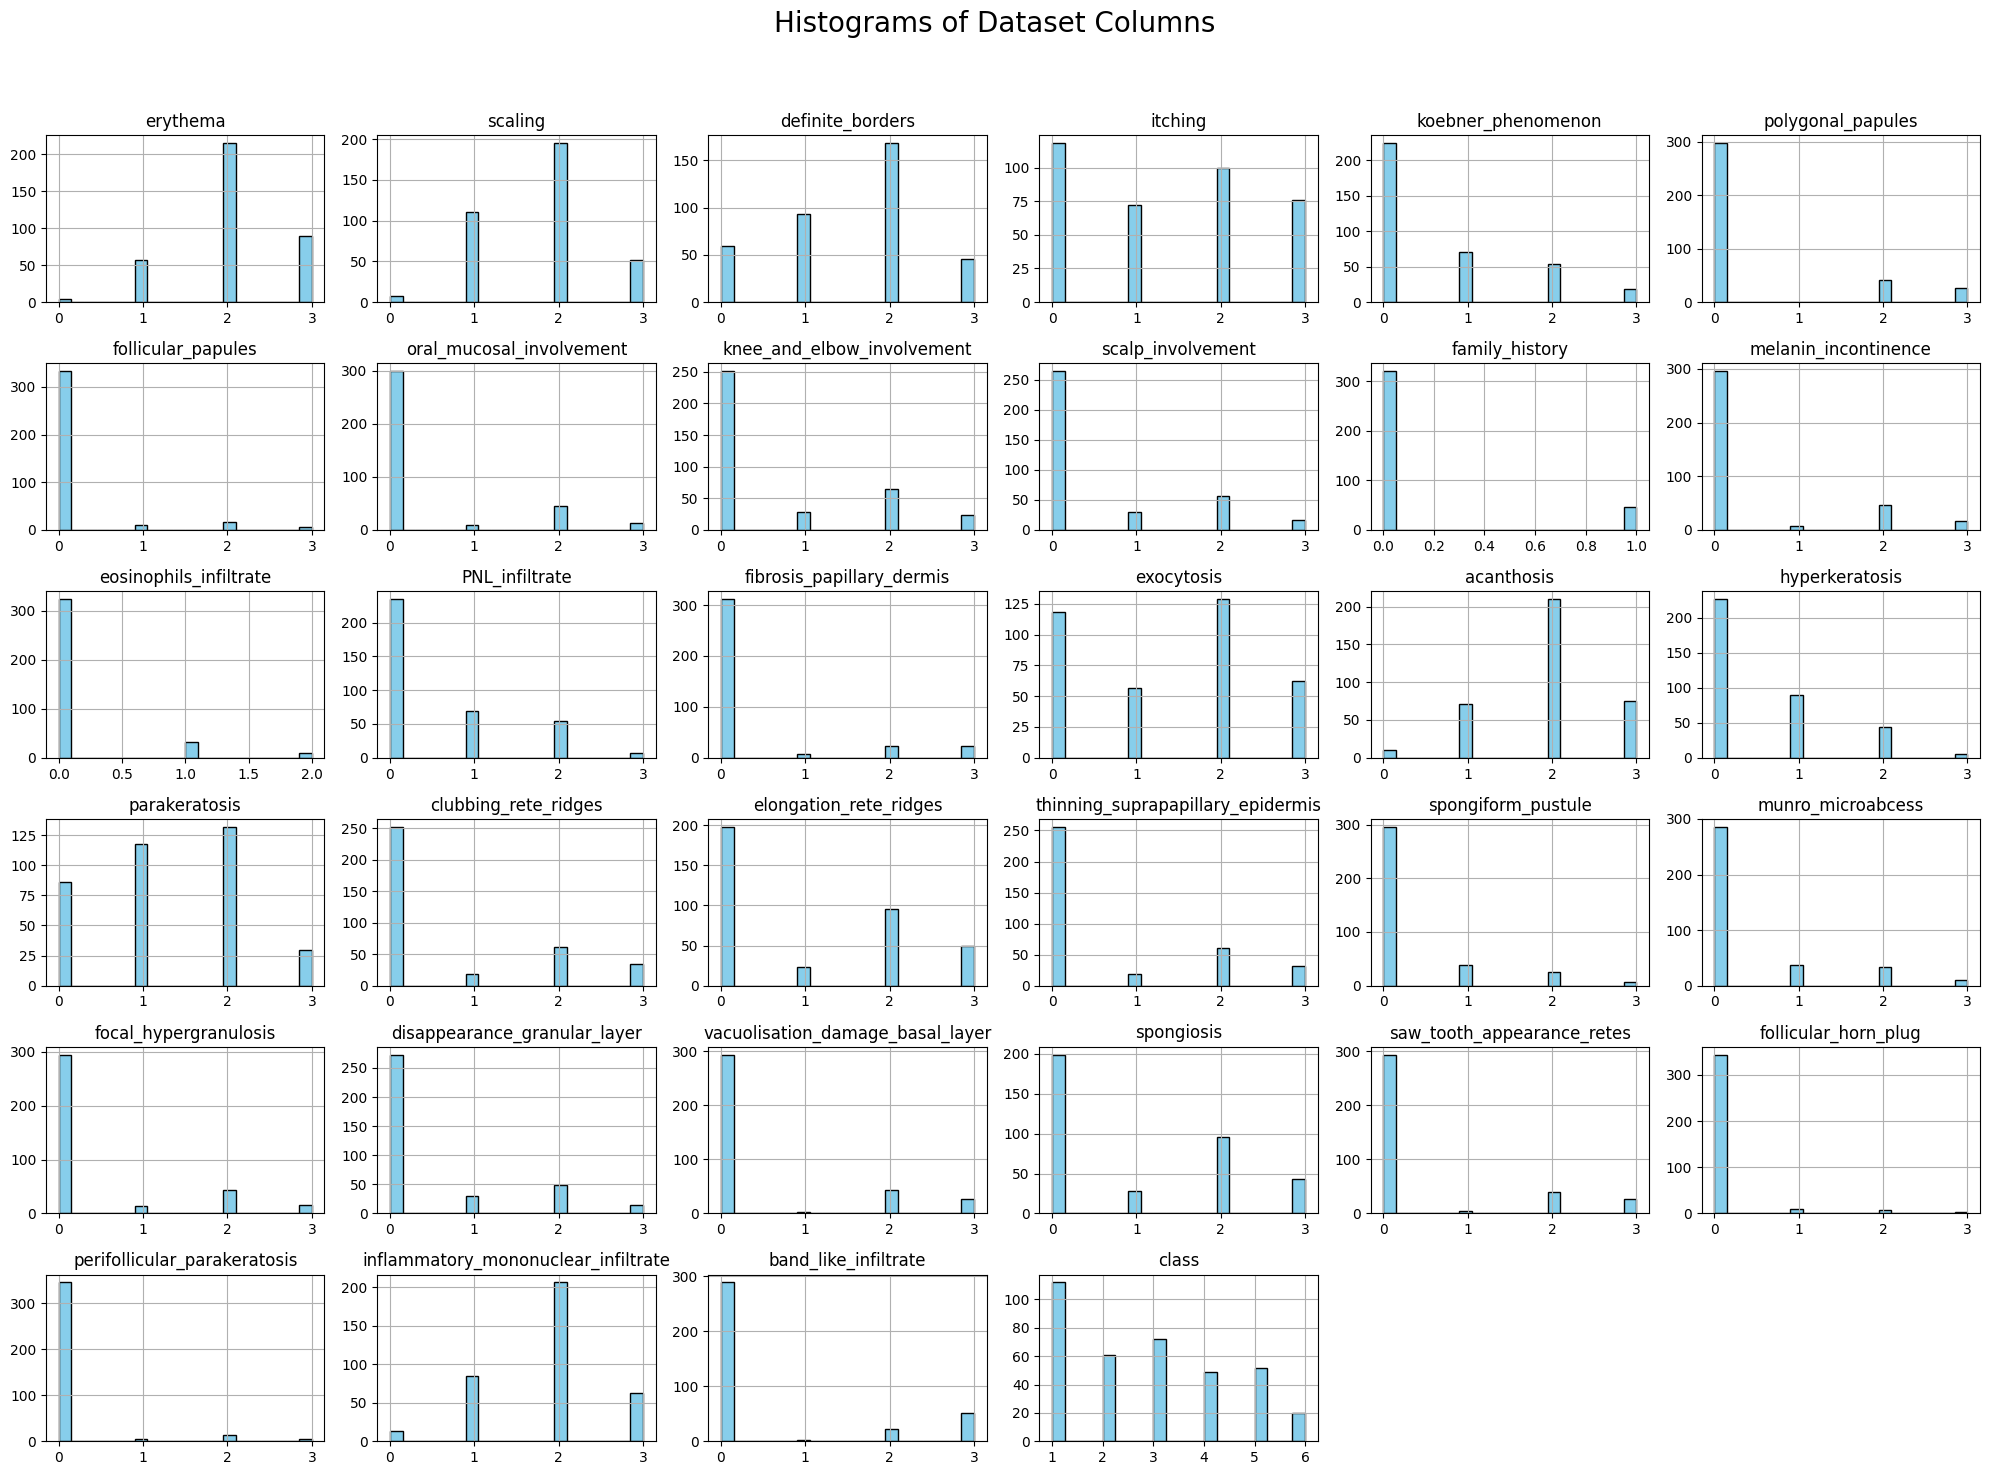

In [88]:
# Plot histograms for each column
import matplotlib.pyplot as plt # Import the matplotlib.pyplot module

df.hist(bins=20, figsize=(20, 15), color='skyblue', edgecolor='black')
plt.suptitle("Histograms of Dataset Columns", fontsize=20)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

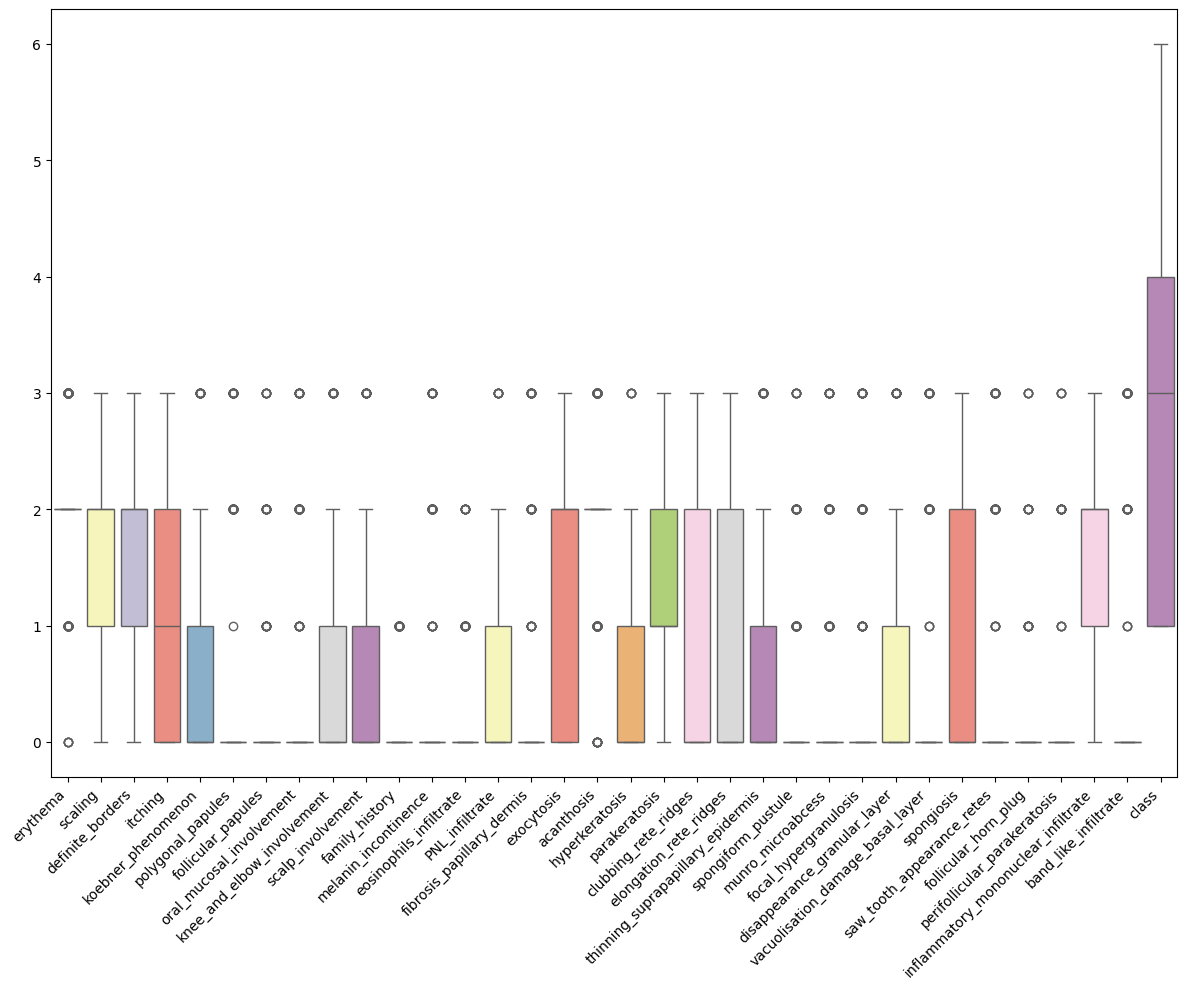

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.boxplot(data=df, palette="Set3")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()